In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"..\Data-raw\recomendationData.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.value_counts

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df['label'].value_counts()

In [ ]:
df['label'].unique()

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [4]:
# Seperating features and target variables
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']
labels = df['label']

In [9]:
acc = []
model = []

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=2)

DECISION TREE

In [26]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion='entropy',random_state=75,max_depth=12)
decisionTree.fit(x_train,y_train)

pred_values = decisionTree.predict(x_test)
x = metrics.accuracy_score(y_test,pred_values)
acc.append(x)
model.append('Decision Tree')

print("The accuracy score of Decision Tree is ", x*100)

The accuracy score of Decision Tree is  98.4090909090909


In [27]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(decisionTree,features,target,cv=5)

In [28]:
score

array([0.98636364, 0.96818182, 0.98181818, 0.97954545, 0.97954545])

In [35]:
import pickle

DT_pkl_file = r"..\models\DecisionTree.pkl"

DT_model_pkl = open(DT_pkl_file,'wb')
pickle.dump(decisionTree, DT_model_pkl)
DT_model_pkl.close()

GAUSSIAN NAIVE BAYES

In [29]:
from sklearn.naive_bayes import GaussianNB

naiveBayes = GaussianNB()

naiveBayes.fit(x_train,y_train)
pred_values = naiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test,pred_values)
acc.append(x)
model.append("Naive Bayes")

print("The Accuracy score of Naive Bayes is ", x)

The Accuracy score of Naive Bayes is  0.9886363636363636


In [37]:
print(classification_report(y_test,pred_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [ ]:
score = cross_val_score(naiveBayes,features,target,cv=5)

In [ ]:
score

In [33]:
NB_pkl_file = r"..\models\NBClassifier.pkl"

NB_model_pkl = open(NB_pkl_file,'wb')
pickle.dump(naiveBayes, NB_model_pkl)
NB_model_pkl.close()

SUPPORT VECTOR MACHINE (SVM)

In [45]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

svm = SVC(kernel='poly',degree=4,C=10)
svm.fit(x_train_norm,y_train)
pred_values = svm.predict(x_test_norm)

x = metrics.accuracy_score(y_test,pred_values)
acc.append(x)
model.append('SVM')

print("SVM's accuracy score is ",x)

print(classification_report(y_test,pred_values))

SVM's accuracy score is  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.89      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

In [ ]:
score = cross_val_score(svm,features,target,cv=5)

In [ ]:
score

svm_pkl_file = r"..\models\SVMClassifier.pkl"

svm_model_pkl = open(svm_pkl_file,'wb')
pickle.dump(svm, svm_model_pkl)
svm_model_pkl.close()

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression


l = LogisticRegression(random_state=100)
l.fit(x_train,y_train)
pred = l.predict(x_test)
sc=  metrics.accuracy_score(y_test, pred)

acc.append(sc)
model.append('Logistic Regression')    
sc

0.95

In [50]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LogisticR = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LogisticR, 'wb')
pickle.dump(l, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [56]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=36, random_state=100)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [68]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.99545455, 0.99318182, 0.98863636])

In [58]:

# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

In [65]:
import xgboost as xgb
XB = xgb.XGBClassifier(random_state=100,n_estimators=48)
XB.fit(x_train,y_train_encoded)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test_encoded,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.96      0.96      0.96        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [66]:
target_encoded = label_encoder.fit_transform(target)
score = cross_val_score(XB,features,target_encoded,cv=5)
score

array([0.98181818, 0.99318182, 0.99090909, 0.99318182, 0.99090909])

In [68]:
XB_pkl_filename = '../models/XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

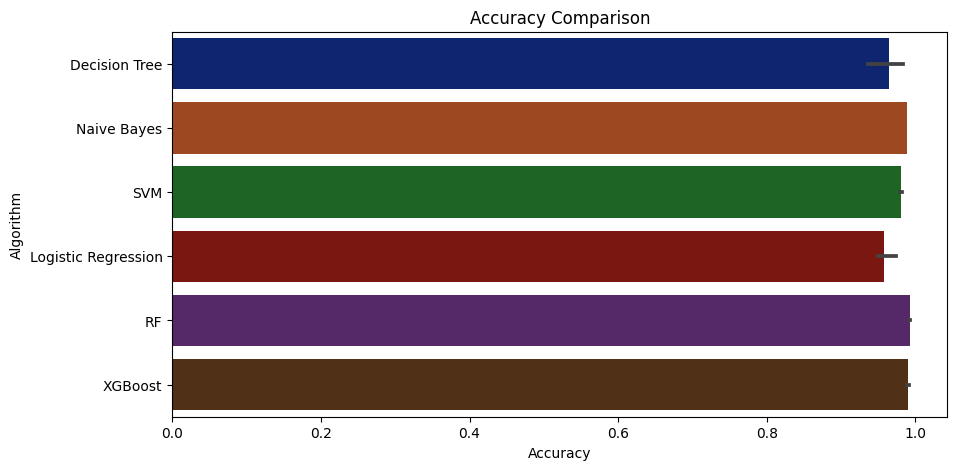

In [73]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [74]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9840909090909091
Naive Bayes --> 0.9886363636363636
SVM --> 0.9818181818181818
Logistic Regression --> 0.95
RF --> 0.9931818181818182
XGBoost --> 0.990909090909091
